In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [2]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [3]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [4]:
data = data.reset_index()

In [5]:
data.head()

,index,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [6]:
data.columns = ['ds', 'y']

In [7]:
data

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
247,2022-08-01,97.74
248,2022-09-01,90.57
249,2022-10-01,93.60
250,2022-11-01,90.38


In [8]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [9]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


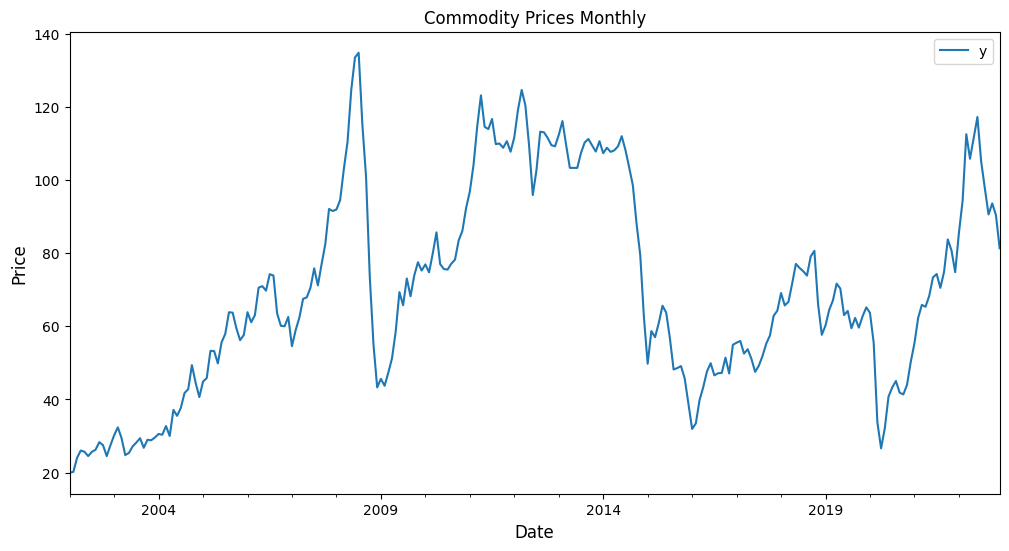

In [10]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [11]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [12]:
train

,Unnamed: 0,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
199,2018-08-01,73.85
200,2018-09-01,79.09
201,2018-10-01,80.63
202,2018-11-01,65.96


In [13]:
test

,Unnamed: 0,Price
0,2019-01-01,60.23
1,2019-02-01,64.50
2,2019-03-01,67.05
3,2019-04-01,71.66
4,2019-05-01,70.30
5,2019-06-01,63.05
6,2019-07-01,64.19
7,2019-08-01,59.47
8,2019-09-01,62.29
9,2019-10-01,59.63


In [14]:
train.columns = ['ds','y']

In [15]:
test.columns = ['ds','y']

In [16]:
train

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69
...,...,...
199,2018-08-01,73.85
200,2018-09-01,79.09
201,2018-10-01,80.63
202,2018-11-01,65.96


In [22]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [35]:

# Initialize the Prophet model
model = Prophet(seasonality_mode='additive', yearly_seasonality=True)

# Fit the model with your training data
model.fit(train)

10:52:04 - cmdstanpy - INFO - Chain [1] start processing
10:52:04 - cmdstanpy - INFO - Chain [1] done processing


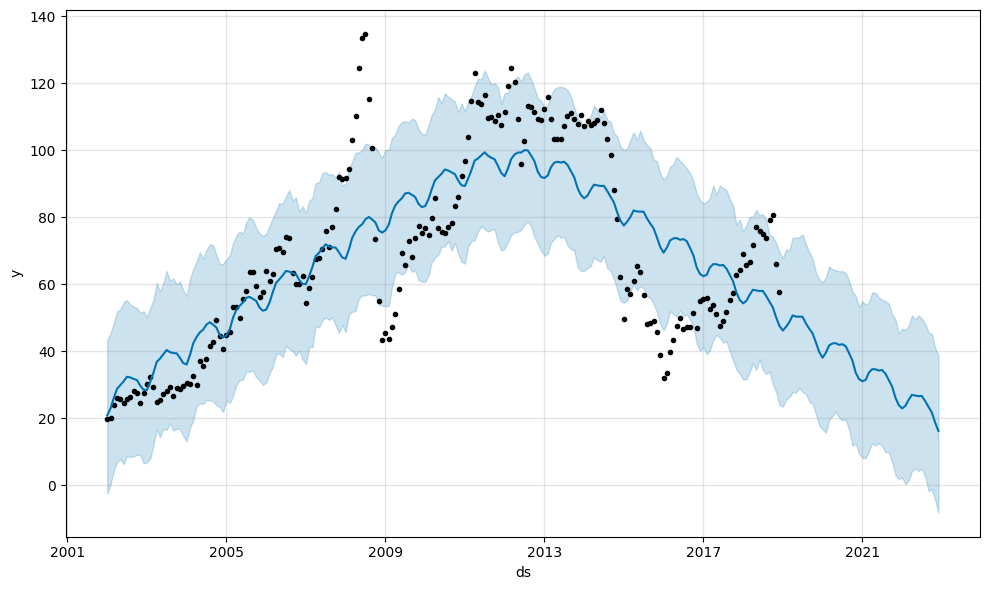

In [36]:


# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq= 'MS')

# Use the model to make predictions
forecast = model.predict(future)

# Plot the original data and the forecast
model.plot(forecast)
plt.show()


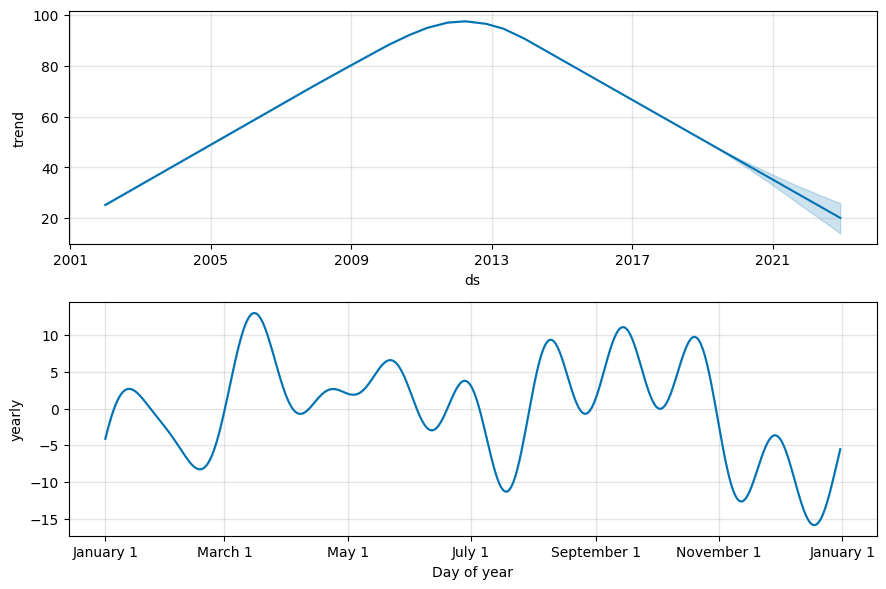

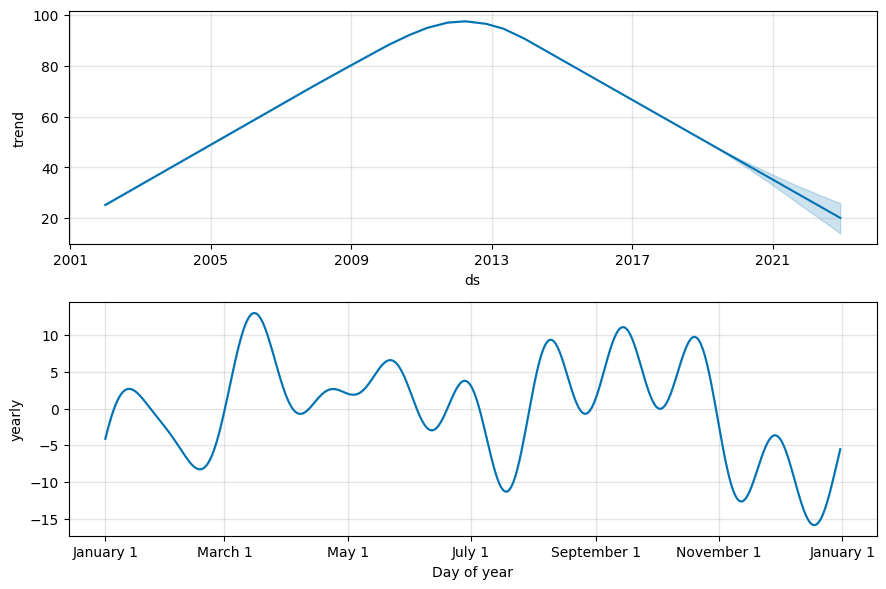

In [37]:
model.plot_components(forecast)

In [25]:
forecast[['ds','yhat']]

,ds,yhat
0,2002-01-01,23.168206
1,2002-02-01,23.954305
2,2002-03-01,26.469179
3,2002-04-01,25.720171
4,2002-05-01,27.514972
...,...,...
247,2022-08-01,21.807945
248,2022-09-01,22.899780
249,2022-10-01,23.390454
250,2022-11-01,20.175580


In [38]:
mean_squared_error(data['y'], forecast[['yhat']])

618.2540554021235

In [39]:
mean_absolute_percentage_error(data['y'], forecast[['yhat']])

0.2698813367806789